In [1]:
# Linear Regression
# A regression attempts to fit a function to observed data to make predictions on new data.
# A linear regression fits a straight line to observed data, attempting to demonstrate a linear
# relationship between variables and make predictions on new data yet to be observed.

# Linear regression is a workhorse of data science and statistics and sets up new foundations for
# later topics like neural networks and logistic regression.

# Machine learning practitioners often take a different approach to validation, starting with a
# train-test split of the data. Statisticians are more likely to use metrics like prediction intervals and
# correlation for statistical significance.

# Machine learning has several techniques under its umbrella, but the one with most use cases
# currently is supervised learning, and regressions play a big role here.

# What are the downsides of a linear regression?
# Every outcome may not fall exactly on that line. It may not remotely follow a straight line at all.
# We should not use linear regression to make predictions outside the range of data we have.

# Warning
# It has become fashionable to make data an oracle for truth. However data is simply from a
# population, and we need to practice discernment on how well represented our sample is. Be just
# as interested (if not more) in where the data comes from and not just what the data says.

In [2]:
# Example
from sklearn import linear_model
reg = linear_model.LinearRegression()

# Multiple linear regression
# Two inputs (x, y) and one output (z)

# Fit a linear model on data
reg.fit([[0, 0], [1, 1], [2, 2]],
        [0, 1, 2])

print("z = {0} + {1}x + {2}y".format(reg.intercept_, reg.coef_[0], reg.coef_[1]))

# Values can be predicted with this linear regression model.

z = 1.1102230246251565e-16 + 0.5x + 0.4999999999999999y


m = [1.93939394]
b = [4.73333333]


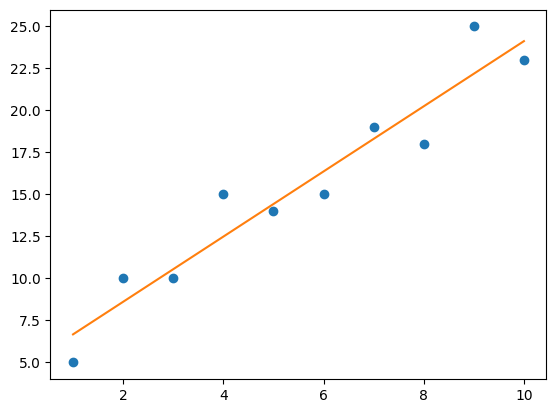

In [3]:
# Using scikit-learn to do a linear regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# Extract input variables (all rows, all columns, but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Fit a line to the points
fit = LinearRegression().fit(X, Y)

# m
m = fit.coef_.flatten()
b = fit.intercept_.flatten()

print("m = {0}".format(m))
print("b = {0}".format(b))


# show in chart
plt.plot(X, Y, 'o') # scatterplot
plt.plot(X, m*X + b) # line of best fit
plt.show()

In [4]:
# Residuals and Squared Errors
# How do statistics tools like scikit-learn come up with a line that fits to these points?
# Questions
# What defines a "best-fit"?
# How do we get to that "best-fit"?

# The residual is the numeric difference between the line and the points. To get the line of best fit is to reduce
# the squares, or more specifically the sum of the squared residuals.
# Another name for residuals are errors, because they reflect how wrong our line is in predicting the data.

In [5]:
# Calculating the residuals for a given line and data
import pandas as pd
# import points
points = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",").itertuples()

# Test with a given line
m = 1.93939
b = 4.73333

# Calculate the  residuals
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual = y_actual - y_predict
    print(residual)


# Why Not Absolute Values?
# Why not just add them up without squaring?
# That will not work because the negatives will cancel out the positives.
# What if we add the absolute values, where we turn all negative values into positive
# values? That sounds promising, but absolute values are mathematically inconvenient.
# More specifically, absolute values do not work well with calculus derivatives that
# are used for gradient descent. 

-1.67272
1.3878900000000005
-0.5515000000000008
2.5091099999999997
-0.4302799999999998
-1.3696699999999993
0.6909400000000012
-2.2484499999999983
2.812160000000002
-1.1272299999999973


In [6]:
# Calculating the sum of squares for a given line and data
import pandas as pd
# import points
points = pd.read_csv("https://bit.ly/2KF29Bd").itertuples()

# Test with agiven line
m = 1.93939
b = 4.73333

sum_of_squares = 0.0
# Calculate sum of squares
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual_squared = (y_predict - y_actual)**2
    sum_of_squares += residual_squared

# sum of squares
print("sum of squares = {}".format(sum_of_squares))

#

sum of squares = 28.096969704500005


In [7]:
# Closed Form Equation
# A closed form equation is an equation for fitting a linear regression by exact equation.
# For a simple linear regression with only one input and one output variable, here at closed form
# that calculate m and b.

# See code below

In [8]:
import pandas as pd
# Load the data
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())

n = len(points)

m = (n*sum(p.x * p.y for p in points) - sum(p.x for p in points)*\
     sum(p.y for p in points)) / (
    n*sum(p.x**2 for p in points) - 
        sum(p.x for p in points)**2)
b = (sum(p.y for p in points)/n) - m*sum(p.x for p in points) / n
print(m, b)

1.9393939393939394 4.7333333333333325


In [9]:
# Inverse Matrix Techniques
# We can use transposed and inverse matrices to fit a linear regression.
# We calculate a vector of coefficients b given a matrix of input value X and 
# a vector of output values y.

# b = (Xt.X)^(-1).Xt.y
# where Xt is the transpose of X

In [10]:
# Example
import pandas as pd
from numpy.linalg import inv
import numpy as np

# Import points
df = pd.read_csv('https://bit.ly/3goOAnt',
                 delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, -1].flatten()

# Add placeholder "1" column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).T

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Calculate coefficients for slope and intercept
b = inv(X_1.transpose() @ X_1)@(X_1.transpose()@Y)
print(b)


# predict against the y_values
y_predict = X_1.dot(b)
y_predict

[ 1.00000000e+00 -1.56819002e-15]


array([ 5., 10., 10., 15., 14., 15., 19., 18., 25., 23.])

In [11]:
# Matrix decomposition use case in finding a closed form equation for data
# When you have a lot of data with a lot of dimensions, computers can start
# to choke and produce unstable results. This is the use case of matrix decomposition.

import pandas as pd
from numpy.linalg import qr, inv
import numpy as np

# import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1].flatten()

# Add placeholder "1" column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).transpose()

# Extract output column (all rows, last columns)
Y = df.values[:, -1]

# calculate coeeficients for slope and intercept using QR decomposition
Q, R = qr(X_1)
b = inv(R).dot(Q.transpose()).dot(Y)

print(b)

[1.93939394 4.73333333]


In [12]:
# QR DECOMPOSITION is the method used by many scientific libraries for linear
# regression, because it copes with large amounts of data more easily and is
# more stable. Numerical stability is how well an algorithm keeps errors in
# approximations. Computers work only to so many decimal places and have to approximate,
# so it becomes important our algorithms to not deteriot with compounding errors in those
# approximations.

# GRADIENT DESCENT
# Gradient descent is an optimization technique that uses derivatives and iterations to minimize/maximize
# a set of parameters against an objective.
# Learning rate is the size of each step taken to minimze/maximize a parameter.

In [13]:
# using gradient descent to find the minimum of a parabola
import random
def f(x):
    return (x-3)**2 + 4

def dx_f(x):
    return 2*(x-3)

# learning rate
l = 0.001

# The number of iterations to perform gradient descent
iterations = 100_000

# Start at a random X
x = random.randint(-15, 15)

for i in range(iterations):
    # get slope
    d_x = dx_f(x)

    # update x by subtracting the (learning rate)*(slope)
    x -= l*d_x

print(x, f(x))

3.000000000000111 4.0


In [14]:
# Gradient Descent and Linear Regression
# When someone says a machine learning algorithm is 'learning', it really is just fitting
# a regression like this.

# performing gradient descent for a linear regression
import pandas as pd

# import points from csv
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())

# Build the model
m = 0.0
b = 0.0

# The learning rate 
l = .001
n = float(len(points)) # number of elements in X

# Perform gradient descent
for i in range(iterations):
    # Slope with respect to m
    D_m = sum(2*p.x*((m*p.x+b)-p.y) for p in points)
    # Slope with respect to b
    D_b = sum(2*((m*p.x+b)-p.y) for p in points)

    # update m and b
    m -= l*D_m
    b -= l*D_b

print("y = {0}x + {1}".format(m, b))

y = 1.9393939393939548x + 4.733333333333227


In [15]:
# Gradient Descent for Linear Regression using SymPy
from sympy import *
m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m*x(i) + b - y(i))**2, (i, 0, n))

d_m = diff(sum_of_squares, m)
d_b = diff(sum_of_squares, b)

# print
print(d_m)
print(d_b)

Sum(2*(b + m*x(i) - y(i))*x(i), (i, 0, n))
Sum(2*b + 2*m*x(i) - 2*y(i), (i, 0, n))


In [16]:
# Executing a linear regression on a dataset
import pandas as pd
from sympy import *

# import points from csv
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)
sum_of_squares = Sum((m*x(i) + b - y(i))**2, (i, 0, n))

d_m = diff(sum_of_squares, m) \
        .subs(n, len(points)-1).doit()\
        .replace(x, lambda i: points[i].x) \
        .replace(y, lambda i: points[i].y) \

d_b = diff(sum_of_squares, b) \
        .subs(n, len(points)-1).doit() \
        .replace(x, lambda i: points[i].x) \
        .replace(y, lambda i: points[i].y)

# Compile using lambdify for faster computation
# lambdify provides convenient functions to transform SymPy expressions to
# lambda functions which can be used to calculate numerical values very fast
d_m = lambdify([m, b], d_m)
d_b = lambdify([m, b], d_b)

# Building the model
m = 0.0
b = 0.0

# The learning rate
l = 0.001

# The number of iterations
iterations = 100_000

# Perform gradient descent
for i in range(iterations):
    # update m and b
    m -= d_m(m, b)*l
    b -= d_b(m, b)*l

print("y = {0}x + {1}".format(m, b))

y = 1.939393939393954x + 4.733333333333231


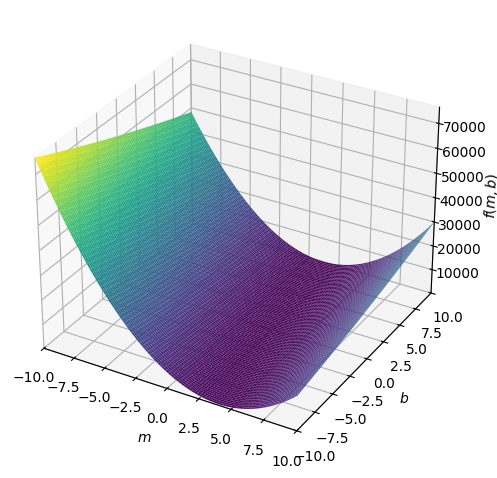

In [17]:
# plotting the loss function for linear regression
from sympy import *
from sympy.plotting import plot3d
import pandas as pd

points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m*x(i) + b - y(i))**2, (i, 0, n))\
                    .subs(n, len(points)-1).doit()\
                    .replace(x, lambda i: points[i].x) \
                    .replace(y, lambda i: points[i].y)

plot3d(sum_of_squares)

In [18]:
# OVERFITTING AND VARIANCE
# The big-picture is not to minimize the sum of squares but to make accurate predictions on new data. This connect-the-dots model
# severely overfit, meaning it shaped the regression to the training data too exactly to the point
# it will predict poorly on new data. It is sensitive to outliers meaning it will have high variance in predictions.

# OVERFITTING IS MEMORIZATION
# When you hear someone say a regression "memorized" the data rather than generalizing it, they
# are talking about overfitting
# The objective is to find effective generalizations in our model rather than memorize data.
# Otherwise, our regression simply turns into a database where we lookup values.
# This is why in machine learning, you will find a bias is added to the model, linear
# regression is considered a highly biased model.

# A biased model leaves some wiggle room hoping to minimize loss on new data for better predictions,
# as opposed to minimizing loss on data it was trained on.

# LASSO AND RIDGE REGRESSION
# Ridge regression adds a further bias to a linear regression in the form of a penalty,
# therefore causing it to fit less to the data. Lasso regression will attempt to marginalize
# noisy variables, making it useful when you want to automatically remove variables that
# might be irrelevant.

# We can not just apply a linear regression to some data, make some predictions with it
# and assume all is OK. A linear regression can overfit even with a bias of a straight line.
# Therefore, we need to check and mitigate both underfitting and overfitting.

# STOCHASTIC GRADIENT DESCENT
# Batch gradient descent: train model on all training data. Stochastic Gradient Descent trains
# on only one sample of the  dataset. In mini-gradient descent, multiple samples of the dataset
# In mini-batch gradient descent, multiple samples of the dataset are used (e.g 10 or 100 data points)
# on each iteration.

# To evaluate our linear regression's reliability, techniques such as train/test split and other
# metrics are used.

In [19]:
# Performing stochastic gradient descent for a linear regression
import pandas as pd
import numpy as np

# Input data
data = pd.read_csv('https://bit.ly/2KF29Bd', header=0)
X = data.iloc[:, 0].values
Y = data.iloc[:, -1].values

print(data)

print(X, Y)

n = data.shape[0] # rows
print(n)

# Build the model
m = 0.0
b = 0.0

sample_size = 1 #sample size
l = 0.0001 # The learning rate

epochs = 1_000_000 # The number of iterations to perform gradient descent

# Performing stochastic gradient descent
for i in range(epochs):
    idx = np.random.choice(n, sample_size, replace=False)
    x_sample = X[idx]
    y_sample = Y[idx]

    # The current predicted value of Y
    Y_predict = m*x_sample + b

    # d/db derivative of loss function
    D_m = (-2/sample_size)*sum(x_sample*(y_sample - Y_predict))

    # d/db derivative of loss function
    D_b = (-2/sample_size)*sum(y_sample-Y_predict)

    m -= l*D_m
    b -= l*D_b

    # print progress
    if i%100_000 == 0:
        print(i, m, b)

print("y = {0}x + {1}".format(m, b))

    x   y
0   1   5
1   2  10
2   3  10
3   4  15
4   5  14
5   6  15
6   7  19
7   8  18
8   9  25
9  10  23
[ 1  2  3  4  5  6  7  8  9 10] [ 5 10 10 15 14 15 19 18 25 23]
10
0 0.001 0.001
100000 1.95482423755368 4.643163884262722
200000 1.9292626650248965 4.71975085822852
300000 1.960372758609977 4.733657184866874
400000 1.9281949599841222 4.7676556469504385
500000 1.9457707635687103 4.730220097640225
600000 1.9589053232589806 4.734673319331234
700000 1.920144575824927 4.729125016198108
800000 1.960326185094745 4.751784768220465
900000 1.9580596574023892 4.724936007541914
y = 1.9477853440417972x + 4.754135140935134


In [20]:
# PRE-CAUTION
# Put every effort in analysing data and model and be careful to not use seed values and randomness to p-hack a 'good' result.

# WHEN NOT TO USE LINEAR REGRESSION
# Data has high variance. If the data is extremely spread out, it is going to drive up the variance
# to the point predictions become less accurate and useful, resulting in large residuals.

# THE CORRELATION COEFFICIENT
# Correlation numerically measures how "off" our predictions are.

# PEARSON CORRELATION
# Measures the strength of the relationship between two variables as a value between -1 and 1.
# A correlation coefficient closer to 0 indicates there is no correlation. A correlation cofficient closer
# to 1 indicates a strong positive correlation, meaning two values are directly proportional to each other.
# When the correlation cofficient is negative, two values are inversely proportional to each other.
# The correlation coefficient is often denoted as r.

# The correlation coefficient is useful if there is a possible relationship between two varibles. If there is a
# strong positive-negative relationship, it will be useful in our linear regression.
# If there is not a relationship, they may just add noise and hurt the model.

In [21]:
# Using Pandas to see the correlation coefficient between every point of variables
import pandas as pd

# Read data into Pandas dataframe
df = pd.read_csv('https://bit.ly/2KF29Bd',
                 delimiter=",")

# print correlation between variables
correlations = df.corr(method='pearson')
print(correlations)

# The correlation coefficient 0.957586 between x and y indicates a strong positive correlation between the
# two variables.

          x         y
x  1.000000  0.957586
y  0.957586  1.000000


In [22]:
# Calculating correlation coffiecient from scratch in Python
import pandas as pd
from math import sqrt

# Import points from csv
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
n = len(points)

numerator = n*sum(p.x * p.y for p in points) - \
            sum(p.x for p in points) * \
            sum(p.y for p in points)

denominator = sqrt(n*sum(p.x ** 2 for p in points) - sum(p.x for p in points)**2) * \
              sqrt(n* sum(p.y**2 for p in points) - sum(p.y for p in points)**2)

corr = numerator / denominator
print(corr)

0.9575860952087218


In [23]:
# STATISTICAL SIGNIFICANCE
# This provides a numerical value that informs if the correlation coefficient is not coincidential.
# N.B statsmodel is a noteworthy library if you want to do statistical analysis. Scikit-learn and other
# machine learning libraries do not provide tools for statistical and confidence intervals.

# We need to not just express the correlation coefficient but also quantify how confident we are that
# the correlation coefficient did not occur by chance.

# Population correlation coefficient is denoted by Greek symbol (rho) while the sample correlation
# coeficient is dentoted by r.

# Our null hypothesis is that there is no relationship between two variables, or more technically the
# correlation coefficient is 0.

# The alternative hypothesis is there is a relationship, and it can be a positive or negative correlation.
# We use a T-distribution rather than a normal distribution to do hypothesis testing with linear regression.

# A T-distribution with 9 degrees of freedom, as there are 10 records and we subtract one. A degree of freedom
# is the number of values in the final calculation of a statistic that are free to vary.

# A statistical critical value is a cut-off point that determines whether to reject or accept a null hypothesis
# in a statistical test.

In [24]:
# Calculating the critical value from a T-distribution
from scipy.stats import t
n = 10

# Lower critical value
lower_cv = t(n-1).ppf(.025)

# Upper critical value
upper_cv = t(n-1).ppf(.975)

print(lower_cv, upper_cv)

-2.2621571628540997 2.2621571628540993


In [25]:
# Testing significance for a linear-looking data
from scipy.stats import t
from math import sqrt

# Sample size
n = 10

lower_cv = t(n-1).ppf(.025)
upper_cv = t(n-1).ppf(.975)

# correlation coefficient
# derived from data at https://bit.ly/2KF29Bd
r = 0.957586

# Perform the test
test_value = r / sqrt((1-r**2)/(n-2))

print("TEST VALUE: {}".format(test_value))
print("CRITICAL RANGE: {}, {}".format(lower_cv, upper_cv))

if test_value < lower_cv or test_value > upper_cv:
    print("CORRELATION PROVEN, REJECT H0")
else:
    print("CORRELATION NOT PROVEN, FAILED TO REJECT H0")

# Calculate p-value
if test_value > 0:
    p_value = 1.0 - t(n-1).cdf(test_value)
else:
    p_value = t(n-1).cdf(test_value)

# Two-tailed, so multiply by 2
p_value = p_value*2
print("P-VALUE: {}".format(p_value))

TEST VALUE: 9.399564671312076
CRITICAL RANGE: -2.2621571628540997, 2.2621571628540993
CORRELATION PROVEN, REJECT H0
P-VALUE: 5.9763860877914965e-06


In [26]:
# The test value here is approximately 9.39956, which is definitely
# outside the range of (-2.262, 2.262) so we can reject the null hypothesis
# and say our correlation is real. That is because the p-value is remarkably
# significant: 0.0000059738. It is highly unlikely these points randomly
# arranged themselves near a line this closely by chance.

# When you have a p-value this low, you can bet you are measuring an engineered
# and tightly controlled process, not something sociological or natural.

# The rule is this; the more data you have that consistently resembles a line; the more
# significant the p-value for your correlation will be. The more scattered or sparse
# the data, the more the p-value will increase and thus indicate your correlation occurred
# random chance.

In [27]:
# COEFFICIENT OF DETERMINATION
# The coefficient of determination, r squared, measures how much variation in one variable
# is explained by the variation of the other variable. It is also the square of the
# correlation coefficient, r.

In [28]:
# Creating a correlation matrix in Pandas
import pandas as pd
# Read data into Pandas dataframe
df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",")

# print correlations between variables
coeff_determination = df.corr(method='pearson')**2
print(coeff_determination)

          x         y
x  1.000000  0.916971
y  0.916971  1.000000


In [29]:
# STANDARD ERROR OF THE ESTIMATE
# One way to measure the overall error of a linear regression is the SSE, Sum of Squared Error.
# Check out for formulas pf SSE and standard Error of the Estimate
# The standard error of estimates looks closely to the standard deviation.It is the standard deviation of the
# linear regrression.

In [30]:
# Calculating the standard error of the estimate
# Here is how we calculate it in Python:
import pandas as pd
from math import sqrt

# Load the data
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=',').itertuples())

n = len(points)

# Regression line
m = 1.939
b = 4.733

# Calculate standard error of estimate
S_e = sqrt((sum((p.y - (m*p.x + b))**2 for p in points)) / (n-2))

print(S_e)

1.87406793500129


In [31]:
# PREDICTION INTERVALS
# This is a confidence interval around each y prediction. It is an estimate of an interval in which a future 
# observation will fall, with a certain probability given what has already been observed.

In [32]:
# Calculating a prediction interval of vet visits for a dog that's 8.5 years old
import pandas as pd
from scipy.stats import t
from math import sqrt

# Load the data
points = list(pd.read_csv('https://bit.ly/2KF29Bd',
                          delimiter=",").itertuples())
n = len(points)

# Linear Regression Line
m = 1.939
b = 4.733

# Calculate prediction interval for x=8.5
x_0 = 8.5
x_mean = sum(p.x for p in points) / len(points)
t_value = t(n-2).ppf(.975)

standard_error = sqrt(sum((p.y - (m*p.x + b))**2 for p in points) / (n-2))

margin_of_error = t_value * standard_error * \
                sqrt(1+ (1/n) + \
                     (n * (x_0 - x_mean)**2) / (n*sum(p.x**2 for p in points) - sum(p.x for p in points)**2))

predicted_y = m*x_0 + b

# Calculate prediction interval
print(predicted_y - margin_of_error, predicted_y + margin_of_error)

16.46251687560351 25.966483124396493


In [33]:
# We not only create a prediction based on a linear regression (e.g a dog that is 8.5 years old will have
# 21.2145 vet visits), but we also are actually able to say something much less absolute: there's a 95%
# probability an 8.5 year old dog will visit the vet between 16.46 and 25.96 times.
# And it's a safer claim because it captures a range rather than a single value, and thus accounts for uncertainty.

In [34]:
# CONFIDENCE INTERVAL FOR PARAMETERS
# Parameters like m and b have their own distributions, and we can model confidence intervals
# around m and b individually to reflect the population's slope and y-intercept.

# Train/Test Split
# Scikit-learn does not support confidence intervals and p-values, as these two techniques are open
# problems for higher-dimensional data.

# Train/Test split is a basic technique machine learning practitioners use to mitigate overfitting,
# where typically 1/3 of the data is set aside for testing and the other 2/3 is used for training.

# The training dataset is used to fit the linear regression, while the testing dataset is used
# to measure the linear regression's performance on data it has not seen before. This technique
# is generally used for all supervised machine learning, including logistic regression and neural networks.

# N.B Training is fitting a regression

In [35]:
# Train/Test split on a linear regression
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# load the data
df = pd.read_csv("https://bit.ly/3cIH97A",
                 delimiter=",")
# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Separate training and testing data
# This leaves a third of the data out for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

model = LinearRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("r^2: %.3f", result)

r^2: %.3f 0.9931751604261634


In [36]:
# CROSS-VALIDATION
# Cross-validation is considered the gold standard of validation techniques.
# It is a technique used to evaluate the performance of a model by repeatedly 
# splitting the dataset into different training and testing sets, allowing for a
# more robust assessment of how well the model generalizes to unseen data, rather
# than just relying on a single train-test split. It helps to identify potential overfitting
# issues and provides a more reliable estimate of the model's accuracy across different
# subsets.

In [37]:
# Using cross-validation for a linear regression
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv('https://bit.ly/3cIH97A',
             delimiter=',')
# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Perform a simple linear regression.
kfold = KFold(n_splits=3,
              random_state=7,
              shuffle=True)

model = LinearRegression()
result = cross_val_score(model, X, Y, cv=kfold)
print(result)
# MSE: Mean Sum of Error
print("MSE: mean=%.3f (stdev-%.3f)"%(result.mean(), result.std()))

[0.99337354 0.99345032 0.99251425]
MSE: mean=0.993 (stdev-0.000)


In [38]:
# We do not have to fold our data by thirds. You can use k-fold validation to split on any proportion.
# Typically, 1/3, 1/5 or 1/10 is used for the preparation of testing,
# but 1/3 is the most common.

# Generally, the k you choose has a result in a test dataset that has a large enough sample for the problem.

In [39]:
# When you get concerned about variance in your model, one thing you can do, rather than a simple train/test split
# or cross-validation, is use random-fold validation to repeatedly shuffle and train/test split
# your data an unlimited number of times and aggregate the testing results.

# Cross-validation
# This is a technique used in machine learning to evaluate the performance of a model on unseen data. Cross-validation
# or rotation estimation or out-of-sample testing, is any of various similar model validation techinques 
# for assessing how the results of a statistical analysis will generalize to an independent dataset.

In [40]:
# Using a random-fold validation for a linear regression
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, ShuffleSplit

df = pd.read_csv("https://bit.ly/38XwbeB",
                 delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output columns (all rows, all columns)
Y = df.values[:,-1]

# Perform a simple linear regression
kfold = ShuffleSplit(n_splits=10, test_size=.33, random_state=7)

model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)

# results
print(results)
print("mean=%.3f (stdev-%.3f)"%(results.mean(), results.std()))

[0.82514286 0.23552344 0.92653455 0.91620594 0.73260142 0.8698865
 0.55254014 0.89593526 0.91570078 0.82086621]
mean=0.769 (stdev-0.208)


In [41]:
# MULTIPLE LINEAR REGRESSION
# A linear regression with two input variables
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv("https://bit.ly/2X1HWH7",
                 delimiter=",")

# Extract input variables (all rows, all columns, but last column)
X = df.values[:, :-1]

# Extract output column(all rows, last column)
Y = df.values[:, -1]

# Training
fit = LinearRegression().fit(X, Y)

# Print coefficients
print("Coefficients = {0}".format(fit.coef_))
print("Intercept = {0}".format(fit.intercept_))
print("z = {0} + {1}x + {2}y".format(fit.intercept_, fit.coef_[0], fit.coef_[1]))

Coefficients = [2.00672647 3.00203798]
Intercept = 20.109432820035963
z = 20.109432820035963 + 2.0067264725128067x + 3.002037976646693y


In [42]:
# CHALLENGES
# SALES PREDICTION WITH LINEAR REGRESSION
# Build a prediction model which predicts sales based on the money spent on different
# platforms for marketing

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

dfAdvert = pd.read_csv('../Data/Advertising.csv',
                       # index_col=0
                      )
dfAdvert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [43]:
# Inspect data
dfAdvert.shape

(200, 4)

In [44]:
dfAdvert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [45]:
dfAdvert.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [46]:
# check for null values
dfAdvert.isnull().sum()
# There are no null values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

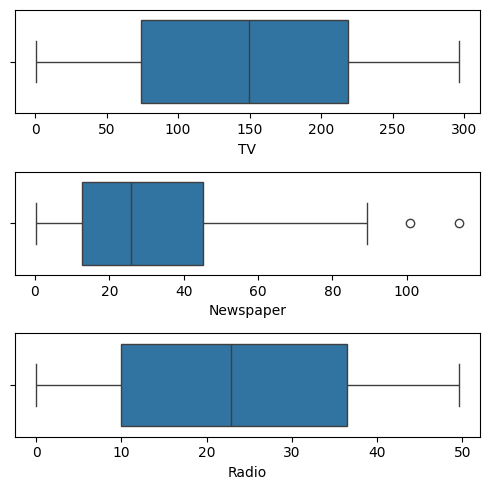

In [47]:
# Outlier analysis
fig, axs = plt.subplots(3, figsize=(5,5))
plt1 = sns.boxplot(x=dfAdvert['TV'], ax=axs[0])
plt2 = sns.boxplot(x=dfAdvert['Newspaper'], ax=axs[1])
plt3 = sns.boxplot(x=dfAdvert['Radio'], ax=axs[2])
plt.tight_layout()
# plt.show()

In [48]:
# There are no considerable outliers
# Newspaper has some outliers
# There are no outliers in Radio and TV

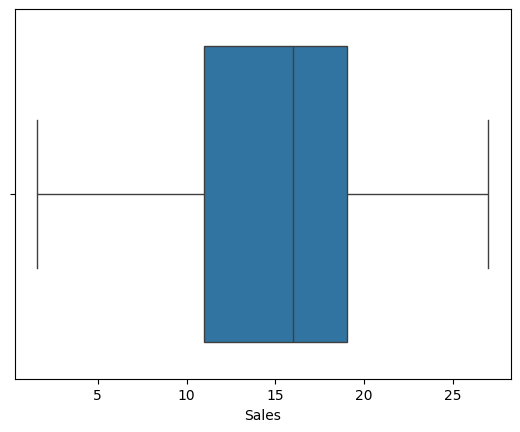

In [49]:
# Exploratory Data Analysis
# Univariate Analysis
sns.boxplot(x=dfAdvert['Sales'])
plt.show()

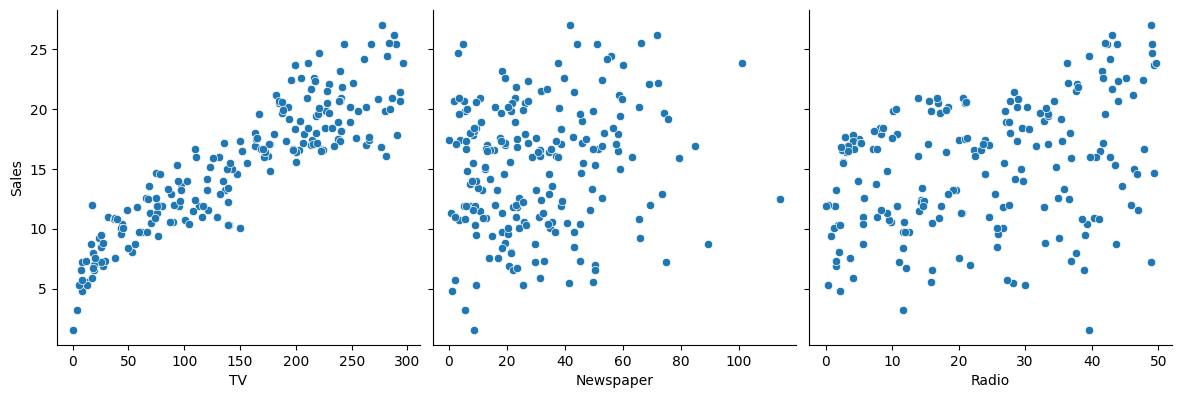

In [50]:
# Variation of sales with other variables using a scatter plot
sns.pairplot(dfAdvert, x_vars=['TV', 'Newspaper', 'Radio'],
             y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

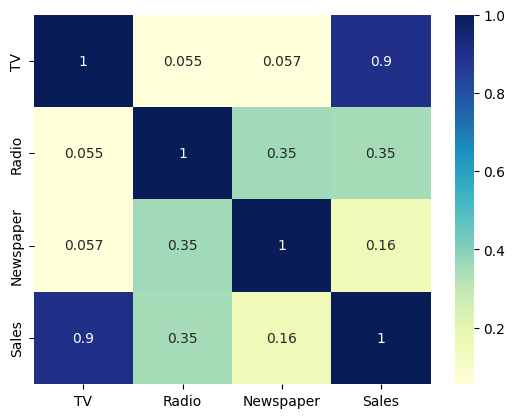

In [51]:
# Correlation between different variables
sns.heatmap(dfAdvert.corr(),
            cmap="YlGnBu",
            annot=True
           )
plt.show()

# As seen in the heatmap, TV correlates more with Sales than anyother variable.

In [52]:
# Building a linear model
X = dfAdvert['TV']
y = dfAdvert['Sales']

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    # train_size=0.7,
                                                    test_size=.3,
                                                    random_state=100
                                                   )

# Let's take a look at the train dataset

In [53]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [54]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [55]:
# Building a linear model
import statsmodels.api as sm

# By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order
# to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added
# the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares)
# attribute of statsmodels as shown below

In [56]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the regression line using OLS
lr = sm.OLS(y_train, X_train_sm).fit()

In [57]:
# Print the parameters, i.e the intercept and the scope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [58]:
# Performing a summary operation list outputs all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           1.52e-52
Time:                        08:28:25   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

In [59]:
# Looking at some key statistics from summary
# The values we are concerned with are;
# 1. The coefficients and significance (p-values)
# 2. R-squared
# 3. F Statistics and its significance
# 4. The coefficient for TV is 0.054, with a very low p-value
# The coefficient is statistically significant, so the association is not purely by chance.

# R-squared is 0.816,
# meaning that 81.6 percent of the variance in sales is explained by Tv
# This is a descent R-squared value

# F-statistic has a very low value (practically low)
# meaning that the model fit is statistically significant, and explained variance isn't purely by chance.
# The fit is significant.

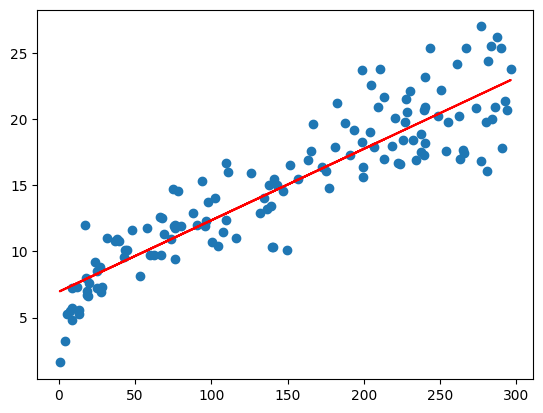

In [60]:
# Visualizing how well the model fit the data
# Scatter plot
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')

In [61]:
# Residual analysis
# To validate assumptions of the model, and hence the reliability for inference.

# Distribution of the error terms
# We need to check if the error terms are normally distributed (which is infact, one of the major assumptions of 
# linear regressions). 
# plotting a histogram of error terms and see what it looks like.

y_train_pred = lr.predict(X_train_sm)
res = (y_train-y_train_pred)

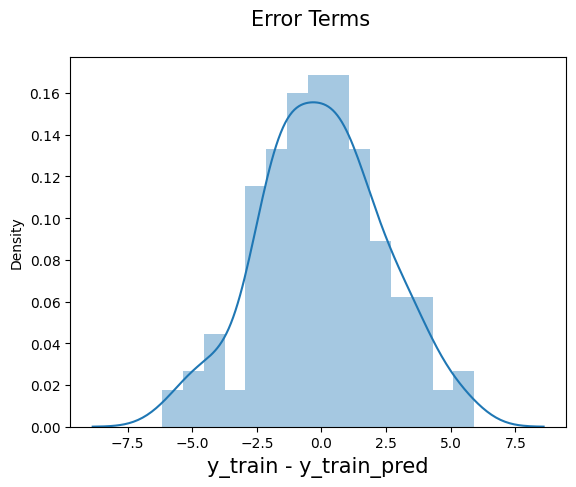

In [62]:
# plot
fig = plt.figure()
sns.distplot(res, bins=15)
fig.suptitle('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

In [63]:
# The residuals follow a normal distribution with a mean of 0.0. This is all good news!

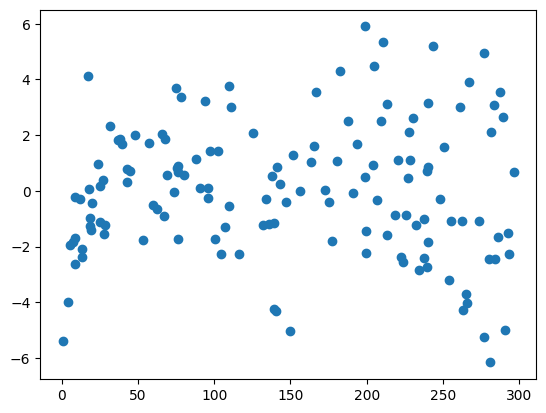

In [64]:
# Looking for patterns in the residuals
plt.scatter(X_train, res)
plt.show()

In [65]:
# This model fit isn't by chance, and has descent predictive power. The normality of the residual error terms 
# allows some inference on the coefficient. Although the variance of the residuals increasing with X, indicates that
# there is significant variation that this model is unable to explain.

In [66]:
# Predictions on the test set
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(2.019296008966232)

In [68]:
# Checking the r-squared on the test
# r2_score is between -1 and 1. The more r2 tends to 1, the more significant is the correlation.
# Thus the correlation is statistically significant.
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

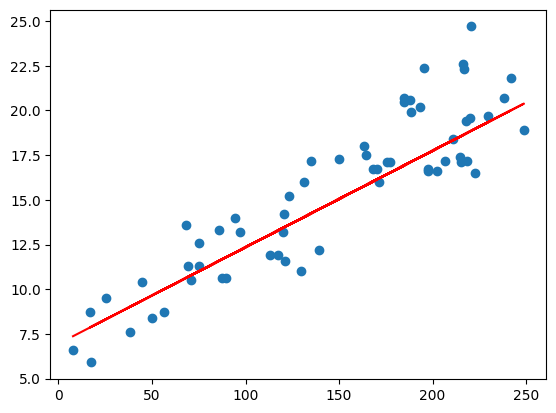

In [69]:
# Visualizing the fit on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054*X_test, 'r')
plt.show()

In [70]:
# Linear Regression using linear_model in sklearn
# When there is only a single feature, we need to add an additional column in order for a linear regression fit
# to be performed successfully

from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size=0.7, test_size=.3, random_state=100)
X_train_lm.shape

(140,)

In [71]:
# Reshape X_train_lm
X_train_lm = X_train_lm.values.reshape(-1, 1)
X_test_lm = X_test_lm.values.reshape(-1, 1)

In [72]:
print(X_train_lm.shape)
print(X_test_lm.shape)
print(y_train_lm.shape)
print(y_test_lm.shape)

(140, 1)
(60, 1)
(140,)
(60,)


In [73]:
# Linear Regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Fit the model using fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [74]:
# intercept
print(lm.intercept_)

# Coefficient
print(lm.coef_)

6.948683200001357
[0.05454575]


In [75]:
# The model is the same as before

In [86]:
# CHALLENGE TWO
# Boston Housing Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# from sklearn.datasets import load_boston

In [87]:
df = pd.read_csv(filepath_or_buffer="http://lib.stat.cmu.edu/datasets/boston",
                delim_whitespace=True,
                skiprows=21,
                header=None)

columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV',
]

In [88]:
# Flatten all the values into a single long list and remove the nulls
values_w_nulls = df.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

# Reshape the values to have 14 columns and make a new df out of them
df = pd.DataFrame(
    data=all_values.reshape(-1, len(columns)),
    columns=columns)

In [90]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [94]:
# Quick Analysis
print("Shape: ", df.shape)
print("Columns: ", df.columns.to_list())

Shape:  (506, 14)
Columns:  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [96]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [98]:
# Data Wrangling
df.isnull().sum()

# No null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

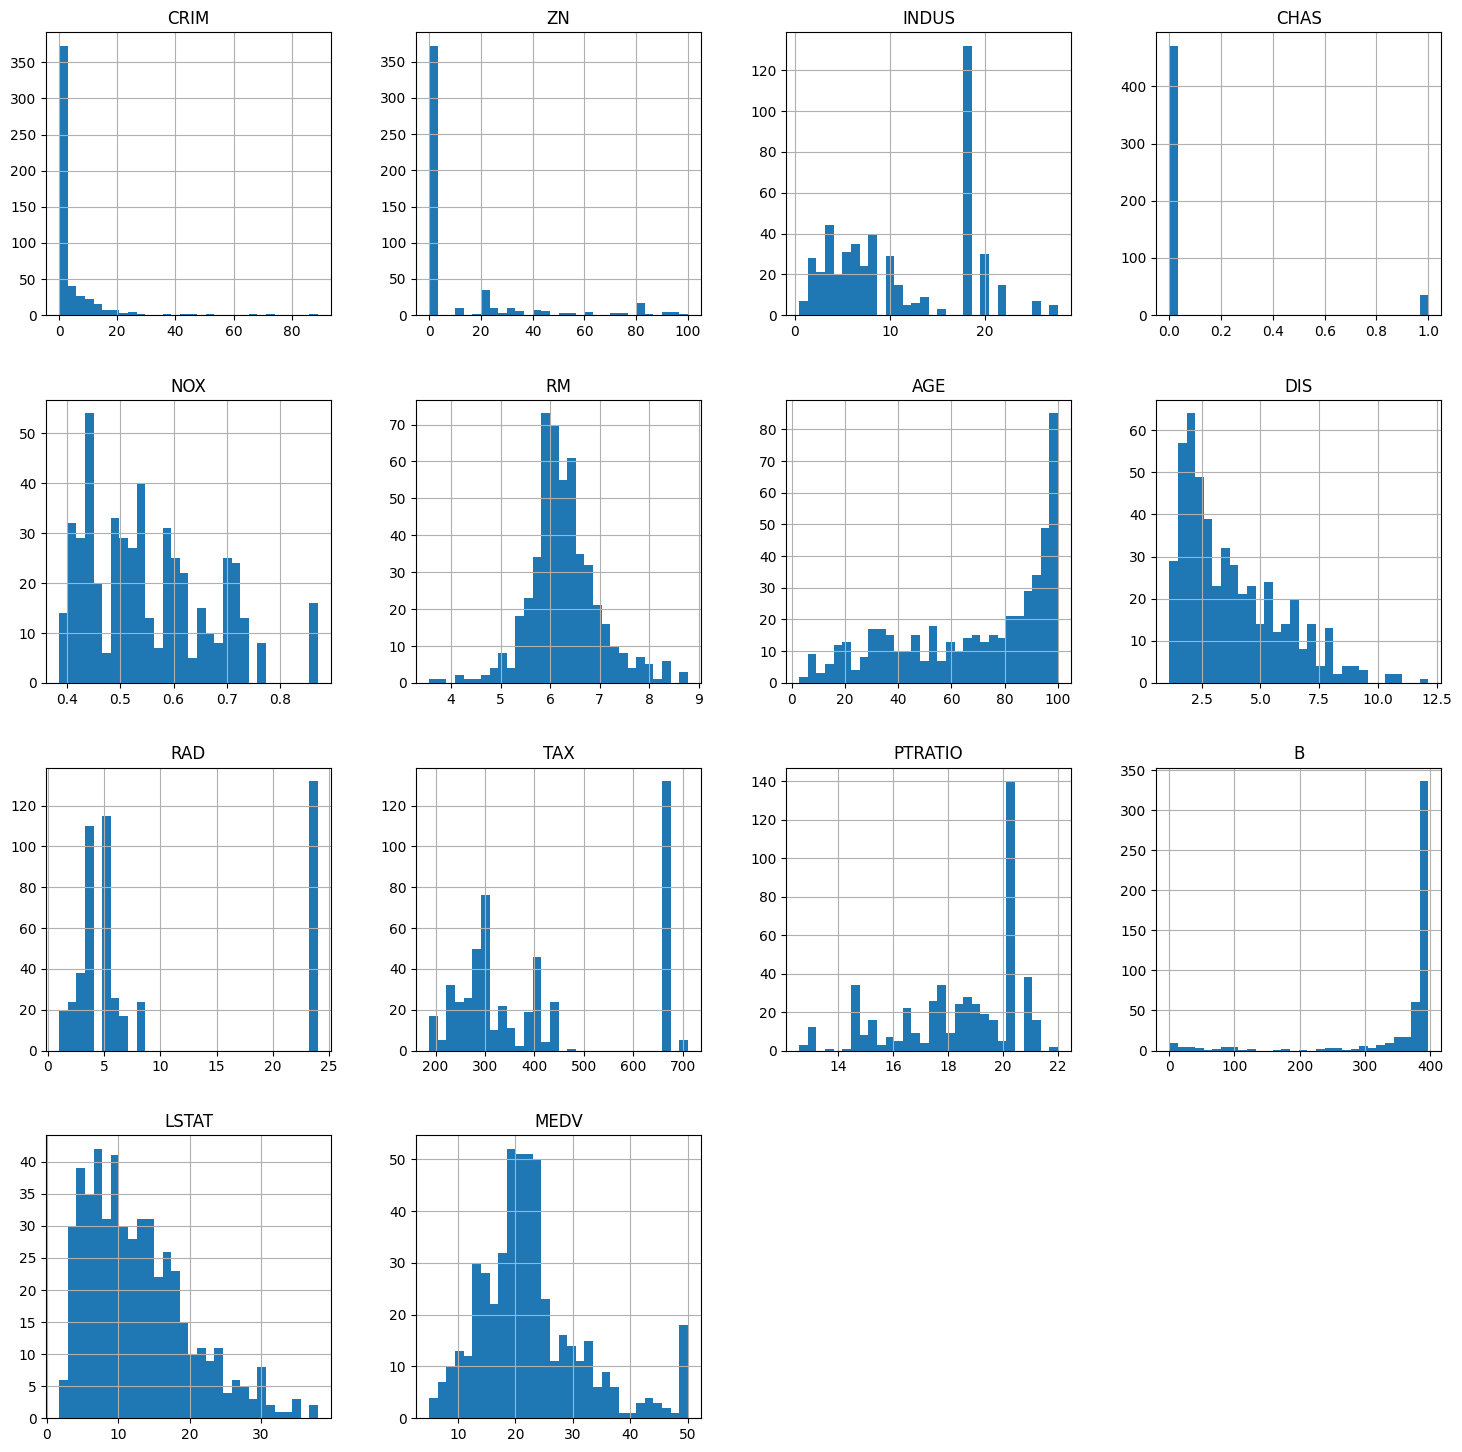

In [101]:
# Visualisation of distribution
df.hist(bins=30, 
        figsize=(18,18));

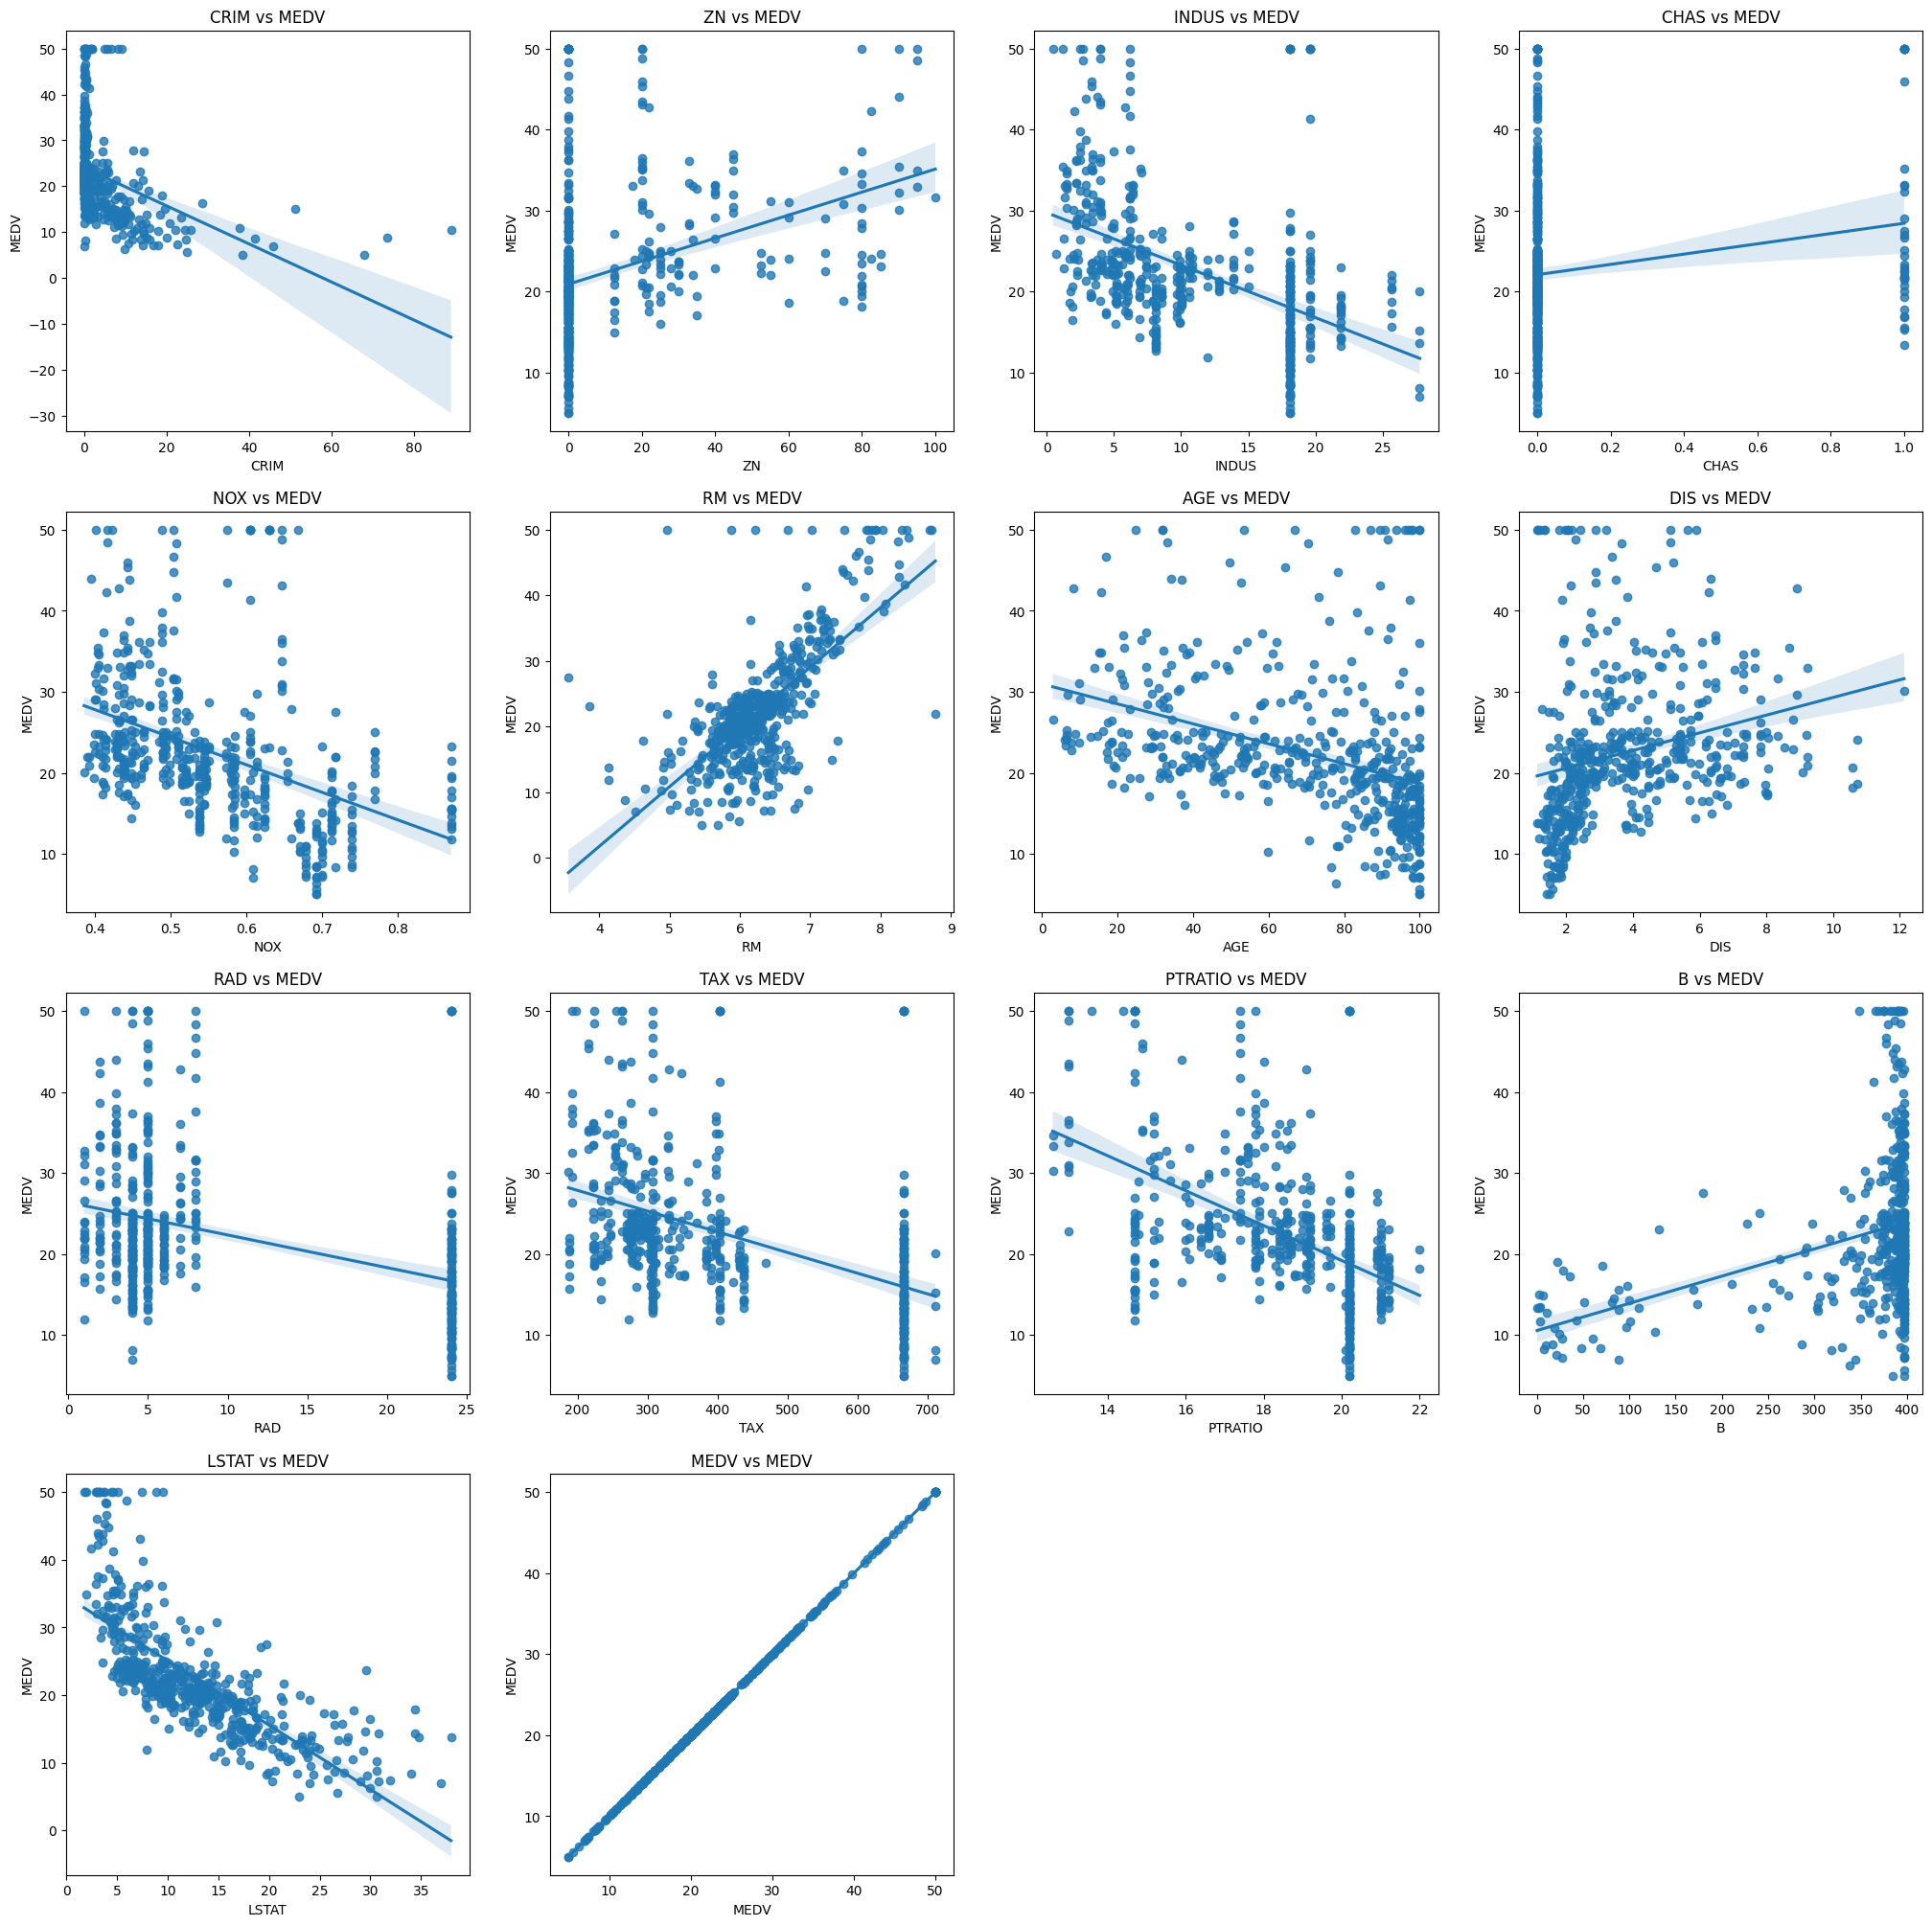

In [102]:
# Visualising variation between the independent variable and the dependent variable
plt.figure(figsize=(25, 25))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    sns.regplot(x=col, y='MEDV', data=df)
    plt.title("%s vs MEDV"%(col))

In [103]:
# Observations so far
# Variable 'RM' seems to have positive linear relationship with target variable 'MEDV'
# Variable 'LSTAT' seems to have negative linear relationship with target variable 'MEDV'
# Using pearson correlation to analysis correlation between variables

<Axes: >

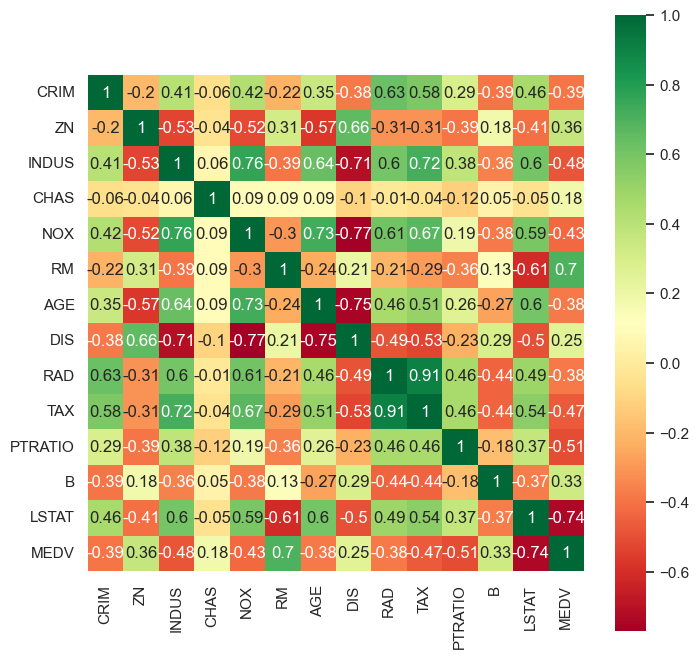

In [104]:
# Visualize pearson corr
sns.set(rc={'figure.figsize': (8, 8)})
sns.heatmap(df.corr(method='pearson').round(2),
            square=True,
            cmap='RdYlGn',
            annot=True);